# Homework Part a
a) Load the dataset in an iPython notebook \[2 point\]

**Note**: *Use the accompanied dataset for this homework. Read the dataset description below carefully and make sure you understand the dataset features and values. 
Dataset description: This dataset (Colon Cancer) contains expression levels of 2000 genes taken in 62 different samples. For each sample, it is indicated whether it came from a tumor biopsy or not (0/1). Note that the first column in the file corresponds to the label of the instance. See the Genes.txt file for description of genes and tissues.*

In [1]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv('HW3data.csv', header=None)
raw_table = pd.read_table('Genes.txt', header=None)

In [2]:
header = raw_table.loc[:, 0]
temp = pd.DataFrame(['value'])
header = pd.concat([temp, header])

In [3]:
raw_data.columns = header
print(raw_data)

    (value,)  (Hsa.3004,)  (Hsa.13491,)  (Hsa.13491,)  (Hsa.37254,)  \
0          0     2.080754      1.099069      0.927763      1.029081   
1          1     1.109457      0.786453      0.445560     -0.146323   
2          0    -0.676530      1.693100      1.559247      1.559983   
3          1     0.534396      1.677537      1.489030      0.778605   
4          0    -1.018903      0.511080      0.755641      1.013816   
5          1    -1.185369     -0.514473     -0.566634      1.224720   
6          0     1.779054      0.423947      0.820696      2.525687   
7          1    -0.889638     -0.315453     -0.073131      1.157503   
8          0    -0.659694     -0.184388     -0.540022      1.122418   
9          1    -1.225801     -0.212615     -0.588923      1.335412   
10         0    -0.377282     -2.620493     -2.763910      0.612038   
11         1     1.639214      0.663551      0.324924      1.456457   
12         0     0.125390      1.286657      1.505225      0.804243   
13    

# Homework Part b
b) Feature selection is an important machine-learning task that allows us to select the most important features in a given dataset. Scikit-learn provides multiple methods for choosing the best features. Use the Recursive Feature Elimination method (REF) with crossvalidation [here](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), and show a plot to demonstrate the performance versus number of selected features \[11 points\].

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [5]:
# Buidling a classification task
X, Y = make_classification(n_samples=1000,
                           n_features=62,
                           n_informative=3,
                           n_redundant=2,
                           n_repeated=0,
                           n_classes=8,
                           n_clusters_per_class=1,
                           random_state=0)

In [6]:
# creating an RFE object
svc = SVC(kernel="linear")

In [7]:
# Running accuracy scoring and cross validation
rfecv = RFECV(estimator=svc,
              step=1,
              cv=StratifiedKFold(2),
              scoring='accuracy')

# Fitting model
rfecv.fit(X, Y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [8]:
# Plotting performance vs number of selected features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<Figure size 640x480 with 1 Axes>

# Homework part c
c) Use the holdout method for testing using only the selected features. Report  the performance. \[5 points\].

In [9]:
from sklearn.cross_validation import train_test_split

c:\users\skyfr\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# setup values and label
X_value = raw_data.iloc[:, 1:2001].values # Values for gene expression
y_value = raw_data.iloc[:, 0].values # Labels for gene markers

In [11]:
# Make training and test data
X_train, X_test, y_train, y_test = \
    train_test_split(X_value,
                     y_value,
                     test_size=0.20,
                     stratify=y_value,
                     random_state=1)

In [12]:
# Explore the dimensions of training and testing data.
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 2000)
Y_train shape:  (49,)
X_test shape:  (13, 2000)
Y_test shape:  (13,)


In [14]:
# Fitting model
rfecv.fit(X_test, y_test)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

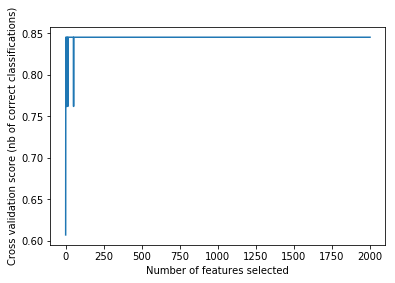

In [15]:
# Plotting performance vs number of selected features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

# effective way to write cross-validation, jobs = number of CPU's you will run if available
scores = cross_val_score(estimator=svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.66666667 0.66666667 0.8        0.8        0.8        0.8
 1.         1.         1.         1.        ]
CV accuracy: 0.853 +/- 0.129


# Homework part d
d) Create a GitHub repository and share your code via GitHub with the instructor by submitting the link on Canvas \[2 points\].

See Github code here: https://github.com/mdelbasha/BME4760_HW3.git